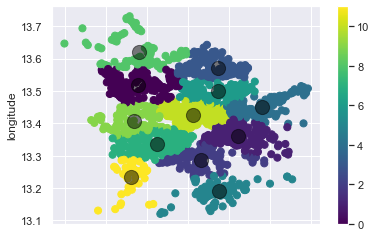

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
from sklearn.cluster import KMeans

sns.set()

df = pd.read_csv('location.csv')

df.dropna(axis=0, how='any', subset=['latitude', 'longitude'], inplace=True)

# Variable with the Longitude and Latitude
X = df.loc[:, ['id', 'latitude', 'longitude']]


kmeans = KMeans(n_clusters=12, init='k-means++')
kmeans.fit(X[X.columns[1:3]])  # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_  # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]])  # Labels of each point

X.plot.scatter(x='latitude', y='longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
